In [22]:
import warnings
warnings.filterwarnings('ignore') #evitar errores en las series de tiempo

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')
df_apple=pd.read_csv("/content/drive/MyDrive/AAPL_2006-01-01_to_2018-01-01_M30.csv", sep=',', index_col='Date', parse_dates=['Date']) #indexacion por fechas para facilitar la visualizacion
df_google=pd.read_csv("/content/drive/MyDrive/GOOGL_2006-01-01_to_2018-01-01_M31.csv", sep=',', index_col='Date', parse_dates=['Date'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) #inicializar ploty
import plotly.graph_objects as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error

In [24]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA


Autocorrelacion (acf)

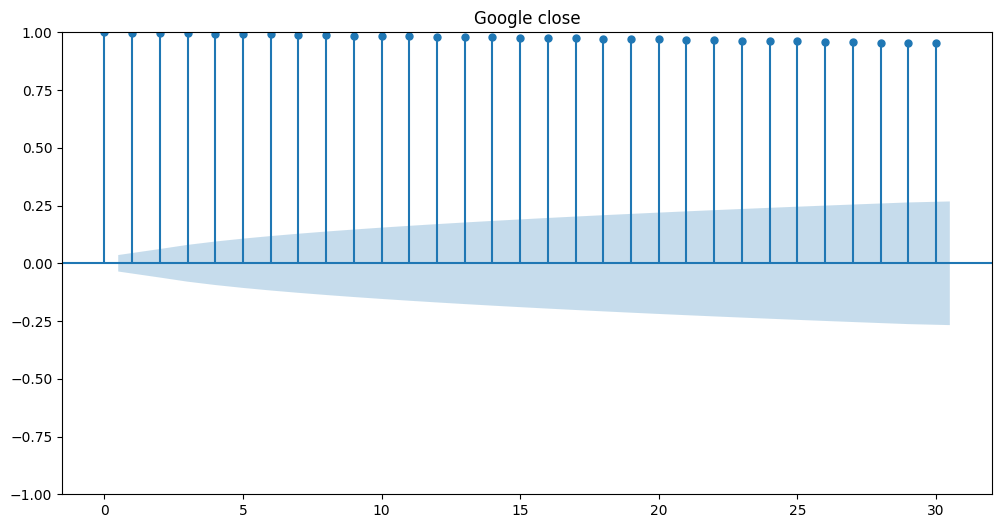

In [25]:
plot_acf(df_apple['Close'], lags=30, title='Google close') #correlacion de close consigo misma del periodo anterior
plt.show()

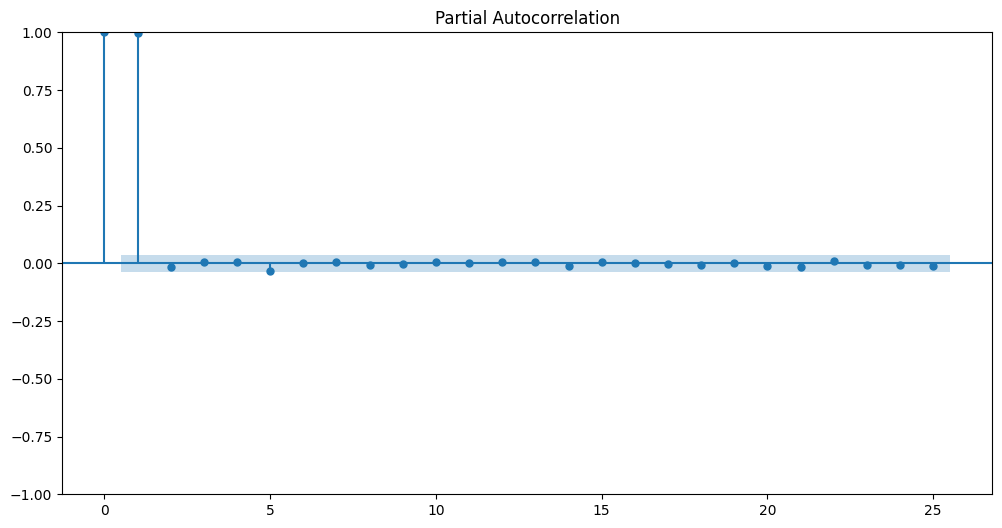

In [26]:
#funcion parcial de autocorrelacion
plot_pacf(df_apple['Close'], lags=25)
plt.show()

##Ruido blanco
Variables aleatorias, no relacionadas, con media constante y varianza limitada que no tiene correlacion con sus lags (acf)


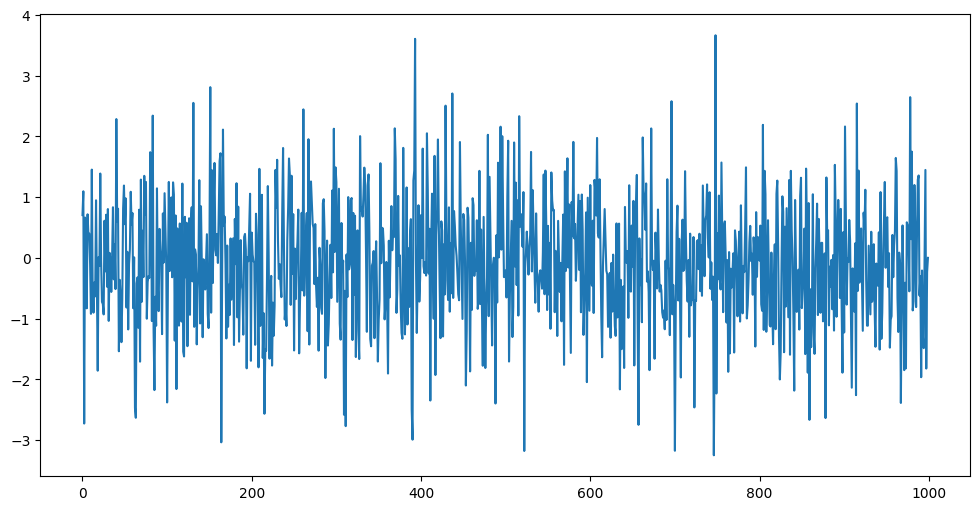

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000) #loc es el promedio (mean), scale es la varianza
plt.plot(white_noise)
plt.show()

##Serie Geometric Brownian Motion
Movimientos aleatorios (de particulas o acciones de bolsa)

In [28]:
delta=0.25 #volatlidad
dt=0.1 #intervalo
x=0.0 #punto incial
xini=0 #valor inicial
n=10 #numero de iteraciones

for k in range(n):
  x+=norm.rvs(scale=delta*2*dt)
  print(x)

0.019021167187397037
-0.019838447502889437
-0.03628459084765878
-0.05303261069966471
-0.050463171425299574
0.02202276209024147
-0.0701819607188813
-0.11834357645433773
-0.08722570363652797
-0.10783737431754613


In [29]:
ntra=10 #numero de trayectorias
n=20 #iteraciones
res=[] #para guardar los caminos diferentes
dfres=pd.DataFrame().assign(traj=0, nsample=0, sample=0)
dfres

,traj,nsample,sample


In [30]:
#genera las trayectorias de un dataframe (dfres)
for i in range(ntra+1):
  for k in range(1,n+1):
    x+= norm.rvs(scale=delta*2*dt)
    res.append(x)
    df2=pd.DataFrame({'traj':[i], 'nsample':[k], 'sample':[x]})
    dfres=pd.concat([dfres, df2], ignore_index=True)

In [31]:
#genera los puntos iniciales
for i in range(ntra+1):
  df2=pd.DataFrame({'traj':[i], 'nsample':[0], 'sample':[xini]})
  dfres=pd.concat([dfres, df2], ignore_index=True)

In [32]:
dfres.tail(10)

,traj,nsample,sample
221,1,0,0.0
222,2,0,0.0
223,3,0,0.0
224,4,0,0.0
225,5,0,0.0
226,6,0,0.0
227,7,0,0.0
228,8,0,0.0
229,9,0,0.0
230,10,0,0.0


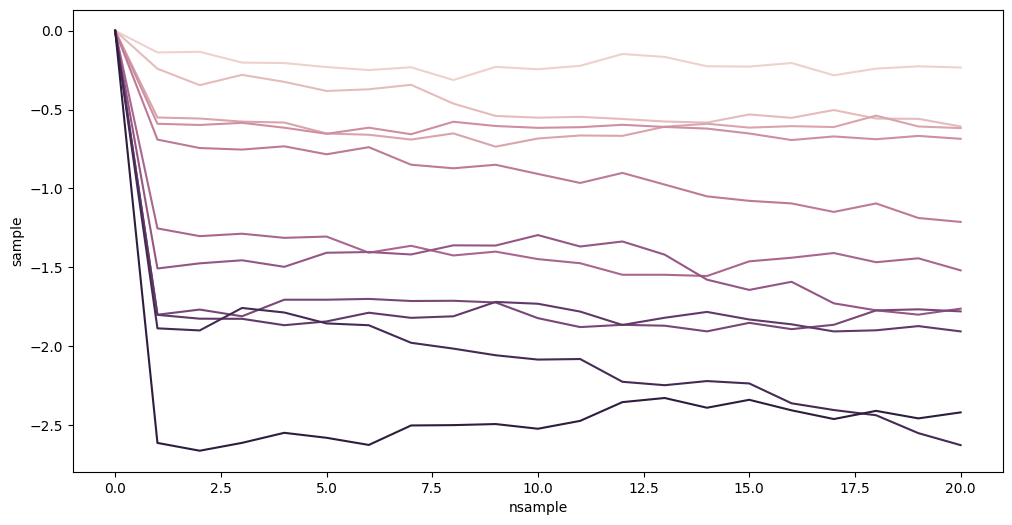

In [33]:
import seaborn as sns
sns.lineplot(x='nsample', y='sample', hue='traj', data=dfres, legend=None, ci=None)
plt.show()

In [34]:
pd.pivot_table(dfres, columns=['nsample'], index=['traj']) #obtencion de trayectorias

sample                                                              \
nsample     0         1         2         3         4         5         6    
traj                                                                         
0          0.0 -0.137840 -0.133844 -0.202122 -0.205215 -0.230363 -0.249684   
1          0.0 -0.241106 -0.345266 -0.279876 -0.324369 -0.382088 -0.371511   
2          0.0 -0.550462 -0.556988 -0.576629 -0.582422 -0.652196 -0.659924   
3          0.0 -0.590188 -0.597918 -0.584358 -0.615197 -0.653740 -0.615262   
4          0.0 -0.690511 -0.744163 -0.753966 -0.733310 -0.783868 -0.738777   
5          0.0 -1.254049 -1.303114 -1.287682 -1.313884 -1.305803 -1.407834   
6          0.0 -1.508264 -1.475635 -1.456193 -1.497732 -1.408518 -1.403843   
7          0.0 -1.801646 -1.768828 -1.811456 -1.706348 -1.706372 -1.701317   
8          0.0 -1.802395 -1.826747 -1.827459 -1.868062 -1.844112 -1.788866   
9          0.0 -1.887967 -1.901218 -1.758776 -1.787481 -1.856651 -1.868309   
10         0.0 -2.614857 -2.664286 -2.614485 -2.550722 -2.582223 -2.627650   

                                       ...                                \
nsample        7         8         9   ...        11        12        13   
traj                                   ...                                 
0       -0.231974 -0.312726 -0.229570  ... -0.222569 -0.147786 -0.166158   
1       -0.343139 -0.462249 -0.540641  ... -0.546362 -0.559850 -0.575827   
2       -0.690486 -0.651342 -0.735434  ... -0.664511 -0.666862 -0.608993   
3       -0.656660 -0.577551 -0.604408  ... -0.611878 -0.596788 -0.610399   
4       -0.849981 -0.872611 -0.850250  ... -0.965653 -0.901940 -0.976022   
5       -1.364276 -1.425543 -1.401281  ... -1.474835 -1.548087 -1.548129   
6       -1.419348 -1.361434 -1.362733  ... -1.368788 -1.336988 -1.420543   
7       -1.714571 -1.713073 -1.723717  ... -1.879974 -1.865558 -1.871292   
8       -1.821369 -1.811594 -1.720294  ... -1.781627 -1.866542 -1.820786   
9       -1.979578 -2.016598 -2.058705  ... -2.082654 -2.227000 -2.248721   
10      -2.504065 -2.501890 -2.495114  ... -2.474940 -2.355984 -2.329813   

                                                                               
nsample        14        15        16        17        18        19        20  
traj                                                                           
0       -0.225580 -0.227484 -0.204761 -0.282752 -0.240364 -0.225765 -0.233435  
1       -0.582675 -0.531122 -0.552586 -0.503161 -0.557206 -0.559014 -0.607379  
2       -0.590214 -0.614627 -0.605370 -0.610991 -0.538846 -0.607348 -0.617823  
3       -0.620851 -0.651946 -0.693480 -0.670705 -0.688347 -0.667319 -0.685673  
4       -1.050751 -1.079188 -1.095480 -1.149486 -1.095640 -1.187937 -1.212916  
5       -1.556001 -1.462901 -1.440065 -1.410145 -1.468458 -1.443653 -1.520283  
6       -1.579201 -1.644169 -1.592627 -1.729268 -1.773771 -1.801084 -1.763052  
7       -1.907168 -1.853093 -1.893135 -1.865370 -1.774239 -1.767342 -1.780369  
8       -1.783746 -1.831861 -1.862456 -1.907448 -1.900420 -1.873795 -1.907366  
9       -2.222377 -2.237526 -2.363371 -2.406144 -2.439245 -2.552741 -2.628918  
10      -2.391620 -2.341254 -2.407979 -2.463293 -2.411444 -2.459187 -2.421112  

[11 rows x 21 columns]

In [35]:
pd.pivot_table(dfres, columns=['nsample'], aggfunc=np.mean) #medias de las trayectorias

nsample,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
sample,0.0,-1.189026,-1.210728,-1.195727,-1.198613,-1.218721,-1.22118,-1.234132,-1.246056,-1.247468,...,-1.279436,-1.279399,-1.288789,-1.319107,-1.315925,-1.337392,-1.363524,-1.353453,-1.376835,-1.39803
traj,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


#Serie de reversion a la media
Para predecir tasas de bancos centrales, niveles de actividad economicos

In [44]:
def mod_vasicek(r0, K, theta, sigma, T=1, N=10, seed=777):
  np.random.seed(seed)
  dt=T/float(N)
  rates=[r0]
  for i in range(N):
    dr=K*(theta-rates[-1])*dt + sigma*np.random.normal()
    rates.append(rates[-1]+dr)
  return range(N+1), rates

In [52]:
#parametros
r0=0.1875
K=0.9
theta= 0.04
sigma=0.012
T=10
seed= np.random.randint(100,900)
N=1000
x,y= mod_vasicek(r0, K, theta, sigma, T, N, seed)

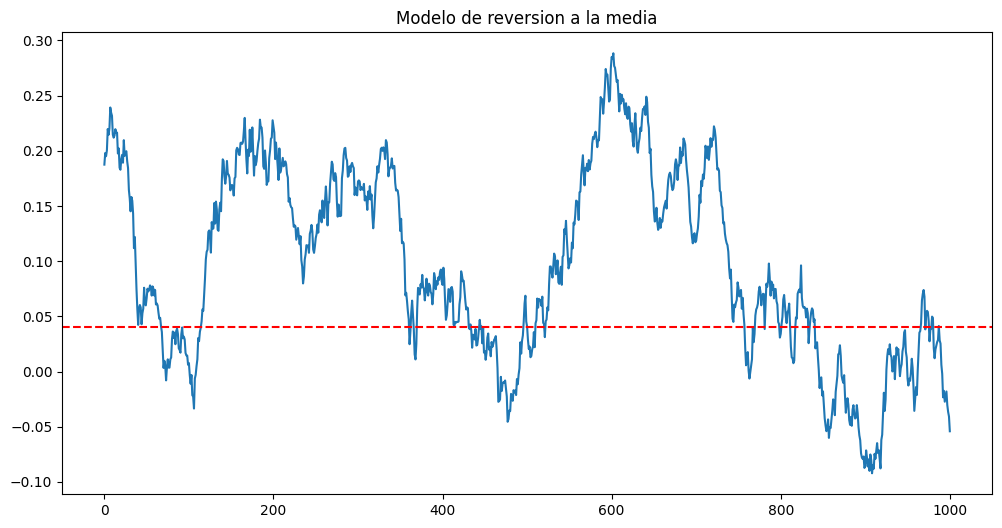

In [53]:
plt.plot(x,y)
plt.title('Modelo de reversion a la media')
plt.axhline(theta, color='r', linestyle='--')
plt.show()

#Serie de tiempo autoregresiva (AR)
proseso aleatorio con regresiones sobre las mismas variables para describir procesos de variacion de tiempo en la naturaleza, economia, etc. La variable de salida depende linealmente de los valores previos y un termino estocastico

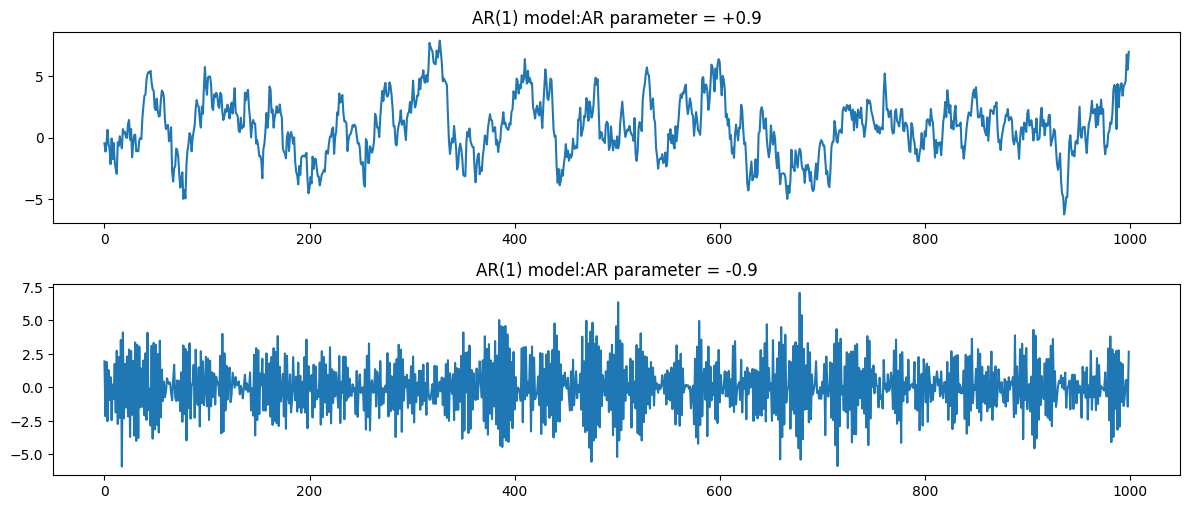

In [59]:
#funcion ArmaProcess y no es necesario emplear la funcion
rcParams['figure.figsize']= 12,10
plt.subplot(4,1,1)
#parametros AR(-0.9) y MA
ar1=np.array([1,-0.9])
ma1=np.array([1])
AR1=ArmaProcess(ar1,ma1)
sim1=AR1.generate_sample(nsample=1000)
plt.plot(sim1)
plt.title('AR(1) model:AR parameter = +0.9')
#parametros AR(0.9) y MA
plt.subplot(4,1,2)
ar2=np.array([1,0.9])
ma2=np.array([1])
AR2=ArmaProcess(ar2,ma2)
sim2=AR2.generate_sample(nsample=1000)
plt.plot(sim2)
plt.title('AR(1) model:AR parameter = -0.9')
plt.tight_layout()

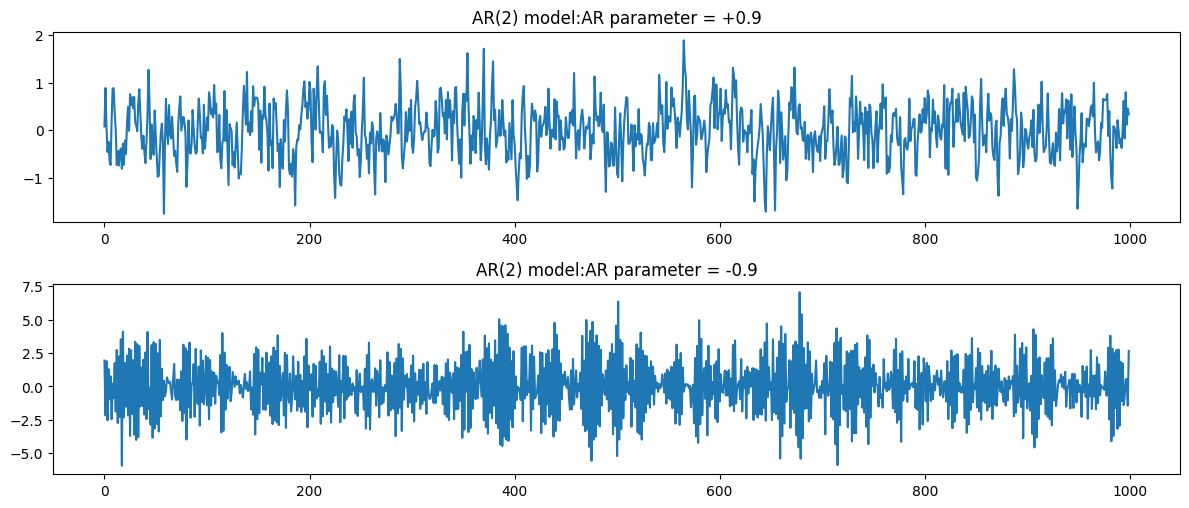

In [60]:
#la misma serie pero con AR(2)
plt.subplot(4,1,3)
#parametros AR(-0.9) y MA
ar3=np.array([2,-0.9])
ma3=np.array([1])
AR3=ArmaProcess(ar3,ma3)
sim3=AR3.generate_sample(nsample=1000)
plt.plot(sim3)
plt.title('AR(2) model:AR parameter = +0.9')
#parametros AR(0.9) y MA
plt.subplot(4,1,4)
ar4=np.array([1,0.9])
ma4=np.array([1])
AR4=ArmaProcess(ar4,ma4)
sim4=AR4.generate_sample(nsample=1000)
plt.plot(sim2)
plt.title('AR(2) model:AR parameter = -0.9')
plt.tight_layout()

In [70]:
#Forecasting con AR
#con model.fit para hacer prediccion automatica hasta el nivel de prediccion adecuado
from statsmodels.tsa.arima.model import ARIMA
sim1 = pd.Series(sim1, index=pd.RangeIndex(start=0, stop=1000))
model = ARIMA(sim1, order=(1, 0, 0))  # (p, d, q) donde d=0 para ARMA
result = model.fit()
print('μ={}, Φ={}'.format(result.params[0], result.params[1]))
print(result.summary())

μ=0.86543858553364, Φ=0.9104495761777097
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1420.788
Date:                Fri, 04 Jul 2025   AIC                           2847.575
Time:                        05:19:33   BIC                           2862.298
Sample:                             0   HQIC                          2853.171
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8654      0.353      2.451      0.014       0.173       1.558
ar.L1          0.9104      0.013     68.844      0.000       0.885       0.936
sigma2     

##Tabla de coeficientes
Std err es el error del valor predicho, z=coef/std err, P>z es p-value del coeficiente (se toma en cuenta si es mayor a 0.5-9

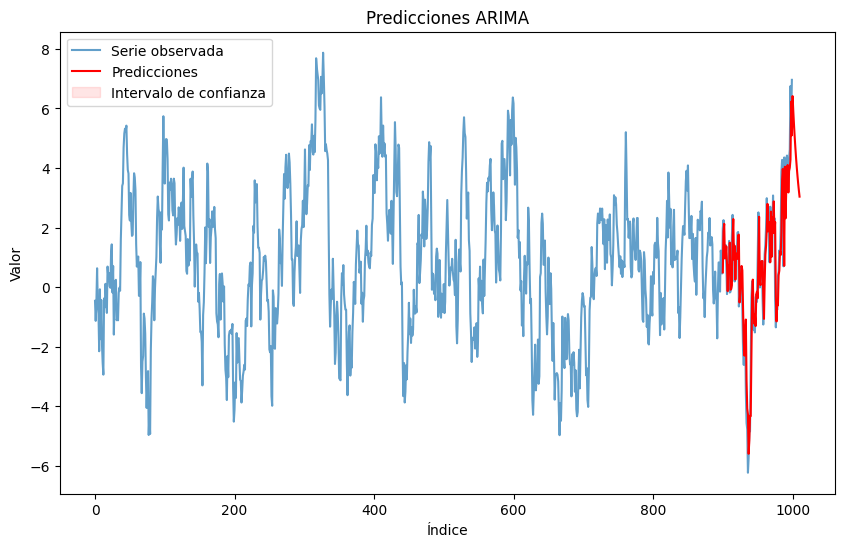

In [72]:
start = 900
end = 1010
predictions = result.get_prediction(start=start, end=end, dynamic=False)
forecast = predictions.predicted_mean  # Valores predichos
pred_ci = predictions.conf_int()  # Intervalos de confianza

# Crear un índice para las predicciones
index = pd.RangeIndex(start=start, stop=end+1)

# Asignar el índice a forecast y pred_ci
forecast = pd.Series(forecast, index=index)
pred_ci = pd.DataFrame(pred_ci, index=index, columns=['lower', 'upper'])

# Crear el gráfico
plt.figure(figsize=(10, 6))
# Graficar la serie original
plt.plot(sim1, label='Serie observada', alpha=0.7)
# Graficar las predicciones
plt.plot(forecast, label='Predicciones', color='red')
# Graficar intervalos de confianza
plt.fill_between(pred_ci.index, pred_ci['lower'], pred_ci['upper'], color='red', alpha=0.1, label='Intervalo de confianza')
plt.title('Predicciones ARIMA')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [76]:
rmse= math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900, end=999))) #revisamos que tan buena es la prediccion
print('RMSE= {}'.format(rmse))

RMSE= 1.167220649158882


#Moving average series
Modelado de series de tiempo univariadas

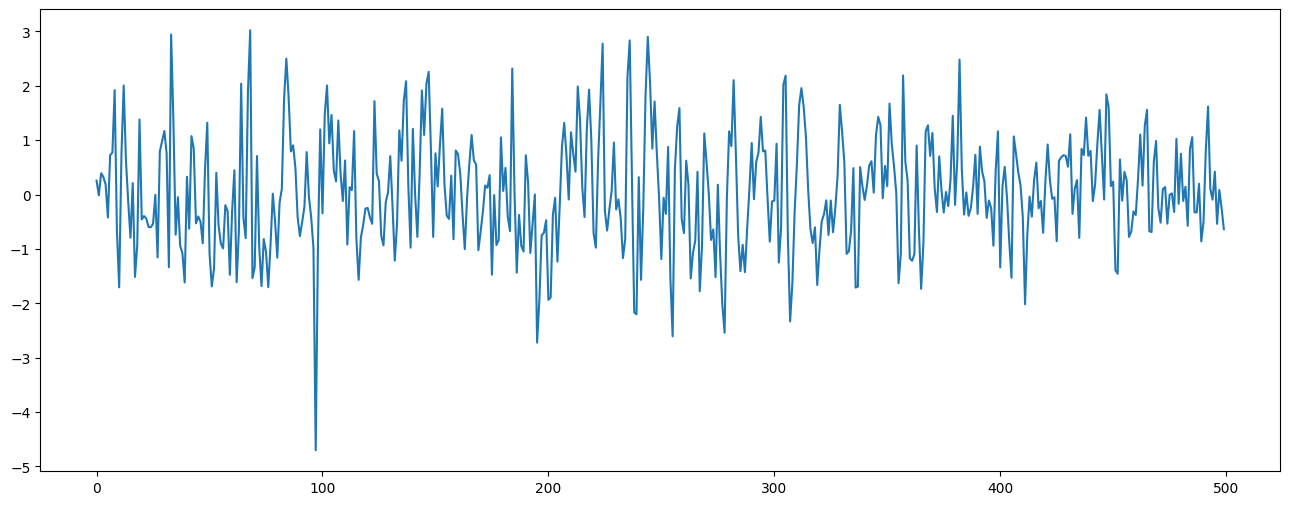

In [90]:
#MA con 0.5
rcParams['figure.figsize']= 16,6
ar1=np.array([1])
ma1=np.array([1,0.5])
MA1=ArmaProcess(ar1,ma1)
sim1=MA1.generate_sample(nsample=500)
plt.plot(sim1)

In [91]:
#Forecasting con MA
model=ARIMA(sim1, order=(0,0,1))
result=model.fit()
print('μ={}, Φ={}'.format(result.params[0], result.params[1]))
print(result.summary())

μ=0.05260984032328369, Φ=0.48936901678006406
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -676.095
Date:                Fri, 04 Jul 2025   AIC                           1358.190
Time:                        06:41:16   BIC                           1370.834
Sample:                             0   HQIC                          1363.151
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0526      0.062      0.843      0.399      -0.070       0.175
ma.L1          0.4894      0.039     12.578      0.000       0.413       0.566
sigma2 

In [92]:
df_google['Close'].diff().iloc[1:].values

array([ 5.01,  3.01,  7.21, ..., -5.65, -4.25, -2.55])

In [93]:
model=ARIMA(df_google['Close'].diff().iloc[1:].values, order=(0,0,3))
result=model.fit()
print('μ={}, Φ={}'.format(result.params[0], result.params[1]))
print(result.summary())

μ=0.27686203047325425, Φ=0.026802070355694988
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3018
Model:                 ARIMA(0, 0, 3)   Log Likelihood              -10112.448
Date:                Fri, 04 Jul 2025   AIC                          20234.896
Time:                        06:43:38   BIC                          20264.958
Sample:                             0   HQIC                         20245.706
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2769      0.131      2.116      0.034       0.020       0.533
ma.L1          0.0268      0.014      1.954      0.051   -7.92e-05       0.054
ma.L2 

In [94]:
rmse=math.sqrt(mean_squared_error(df_google['High'].diff().iloc[900:1000].values, result.predict(start=900, end=999)))
print('RMSE= {}'.format(rmse))

RMSE= 2.6627390490441436
